In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

Download the book

• Simo Särkkä and Lennart Svensson (2023). Bayesian Filtering and
Smoothing, Second Edition. Cambridge University Press. https://
users.aalto.fi/~ssarkka/pub/bfs_book_2023_online.pdf

## Task 1
1. Reproduce the example in Figure 3.1.

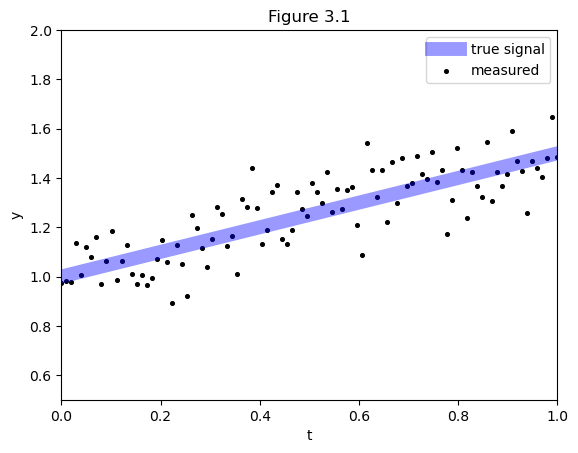

In [55]:
from scipy import stats
sigma = .1
theta = np.array([[1, .5]]).T

H_k = np.linspace([1, 0],[1, 1],100)
t_k = H_k[:,1]
y_signal = H_k @ theta
y_meas = stats.norm.rvs(loc=y_signal, scale=sigma)
plt.plot(t_k, y_signal, linewidth=10., c='b', label='true signal', alpha=.4)
plt.scatter(t_k, y_meas, c='k', s=7, label='measured')
plt.xlabel("t")
plt.ylabel("y")
plt.ylim(.5, 2)
plt.xlim(0, 1)
plt.legend()
plt.title("Figure 3.1")
plt.show()

## Task 2

2. Reproduce the example in Figure 3.2.


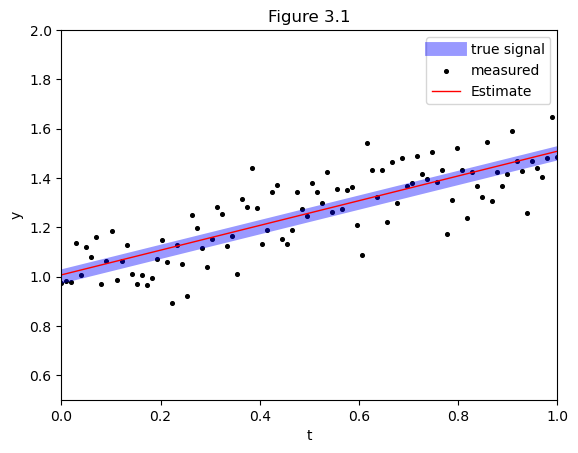

In [56]:
P_0 = (np.eye(2) * sigma)
m_0 = np.ones_like(theta)
P_0_inv = np.linalg.inv(P_0)
a = ( P_0_inv + sigma**-2 * H_k.T @ H_k)
b = (sigma**-2 * H_k.T @ y_meas + P_0_inv @ m_0)
m_t = np.linalg.inv(a) @ b
P_t = np.linalg.inv(P_0_inv + sigma**-2 * H_k.T @ H_k)

y_pred = H_k @ m_t
plt.plot(t_k, y_signal, linewidth=10., c='b', label='true signal', alpha=.4)
plt.scatter(t_k, y_meas, c='k', s=7, label='measured')
plt.plot(t_k, y_pred, linewidth=1., c='r', label='Estimate')
plt.xlabel("t")
plt.ylabel("y")
plt.ylim(.5, 2)
plt.xlim(0, 1)
plt.legend()
plt.title("Figure 3.1")
plt.show()

## Task 3

3. Reproduce the example in Figure 6.1.

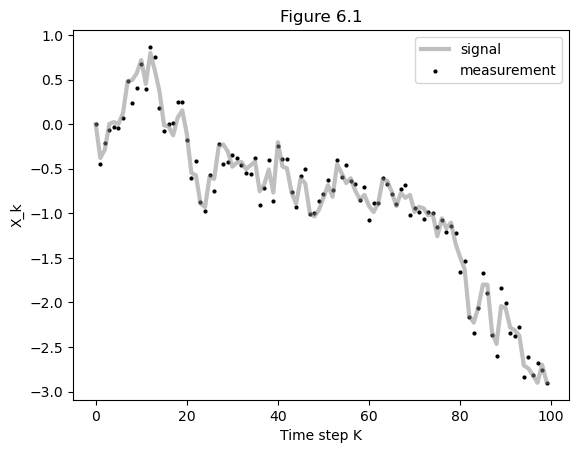

In [79]:
# Straight from the recurrent definition 

steps = np.arange(0,100)
x_k = np.zeros_like(steps, dtype='float32')
y_k = np.zeros_like(x_k)
Q = .2
R = .1
for k in steps[1:]:
    x_k[k] = stats.norm.rvs(loc=x_k[k - 1], scale=Q) # Random walk
    y_k[k] = stats.norm.rvs(loc=x_k[k], scale=R) # Our sensors messing up
    
plt.plot(steps, x_k, linewidth=3., c='gray', alpha=.5, label='signal')
plt.scatter(steps, y_k, s=4, c='k', marker='o', label='measurement')
plt.legend()
plt.xlim([0, 100])
plt.axis('tight')
plt.xlabel("Time step K")
plt.ylabel("X_k")
plt.title("Figure 6.1")
plt.show()

## Task 4
4. Complete Exercise 6.1 (in page 106).

Derive the Kalman filter equations for the following linear-Gaussian filtering
model with non-zero-mean noises:

$$
x_k = A x_{k-1} + q_{k-1} \\
y_k = H x_k + r_k
$$

Where

$q_{k-1} \sim N(m_q, Q)$ and $r_k \sim N(m_r, R)$.

Well, a simple solution to this would be to just incorporate a bias term (known or unknown), to the state vector, i.e., to rewite the model like so:


$$
x_k = A x_{k-1} + \hat q_{k-1} - m_q 
$$
$$
y_k = H x_k + \hat r_k - m_r
$$

In this case the $\hat{q}$ and $\hat{r}$ are now distributed as zero-centered normal gaussians.


In case the values $m_q$ and $m_r$ are known beforehand, we can move them to the right hand side, and solve these equations with regular Kalman filter:

$$
\hat x_k  = A x_{k-1} + \hat q_{k-1}
$$
$$
\hat y_k  = H x_k + \hat r_k 
$$

Where $\hat x_k = x_k + m_q$ and $\hat y_k = y_k + m_r$

Unfortunately, I couldn't find the solution on the case where $m_r$ and $m_q$ aren't known initially.